# Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. 

**Цель исследования** - провести анализ и подготовить план действий по удержанию клиентов.

Задачи исследования:

- спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    1) выделить целевые группы клиентов;
    
    2) предложить меры по снижению оттока;
    
    3) определить другие особенности взаимодействия с клиентами.

**Описание данных:**

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:


Текущие поля в датасете:

- 'Churn' — факт оттока в текущем месяце;

Данные пользователя за предыдущий до проверки факта оттока месяц:
- 'gender' — пол
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
- 'Phone' — наличие контактного телефона
- 'Age' — возраст
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)
    
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
- 'Group_visits' — факт посещения групповых занятий
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон


## Изучение общей информации

In [1]:
# импортируем необходимые для работы библиотеки

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools


In [2]:
# создадим переменную и загрузим данные

df = pd.read_csv('')

In [3]:
# выводим общую информацию о датасете

display(df.columns, df.head(), df.describe())
print('*' * 50)
df.info()
print('*' * 50)
for column in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period',\
               'Group_visits', 'Month_to_end_contract', 'Lifetime', 'Churn']:
    print(df[column].unique())
    print('*' * 50)

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_c

In [4]:
# проверка на наличие дубликатов

df.duplicated().sum()

0

В результате ознакомления с данными, можно сделать следующие выводы:

- Названия столбцов оформлены со стилистическими ошибками (регистр);
- Практически все столбцы приведены к правильному типу данных (для колонки Month_to_end_contract необходимо выбрать соответствубщий тип данных);
- В данных отсутствуют пропущенные значения;
- В данных отсутствуют нетипичные значения;
- В данных отсутствуют дубликты.

Произведем предобработку данных и подготовим датасет к анализу.

In [5]:
# приведем названия столбцов к единому регистру

df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [6]:
# установим соответствующий формат для столбца month_to_end_contract

df['month_to_end_contract'] = df['month_to_end_contract'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Данные подготовлены. Проведем исследовательский анализ данных.

## Исследовательский анализ данных (EDA)

Прежде чем отправить данные на вход модели и получить прогнозы, рассмотрим информацию о пользователях, а также выписки из журнала посещений, изучим распределения наших критериев и целевой переменной (отток клиентов фитнес-центра), построим матрицу корреляции между критериями посетителей.

### Анализ средних значений по всей выборке

Для начала изучим средние значения и стандартные отклонения в целом по всей выборке. Это позволит нам сделать усредненный портрет посетителя фитнес-центра, что крайне важно для планирования оттока и борьбы с данным явлением.


In [7]:
# изучим средние значения

df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Получаем усредненный портрет посетителя фитнес-центра:

    Женщина;
    29 лет;
    Проживает/работает рядом с фитнес-центром;
    Есть контактный номер телефона;
    
    Не является сотрудником организации-партнера;
    Не участник акции "Приведи друга";
    
    С момента первого обращения прошло 3 месяца;
    Текущий абонемент на месяц;
    До окончания текущего действующего абонемента 1 месяц;
    Не посещает групповые занятия;
    
    Средняя частота посещений в неделю за все время: 1-2 раза;
    Средняя частота посещений в неделю за предыдущий месяц: 1-2 раза;
    Суммарная выручка от других услуг фитнес-центра: 136 - 146 у.е.

Определим, в чем различия между теми, кто ушел в отток и теми, кто остался.

### Анализ средних значений по целевому признаку

Рассмотрим различия в портретах отвалившихся посетителей и оставшихся.

In [8]:
# выводим средние значения

df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [9]:
# выводим медианные значения

df.groupby('churn').median()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,1,1,1,0,1,6,0,30,149.881171,6,4,2.043252,2.046697
1,1,1,0,0,1,1,0,27,103.814686,1,1,1.491187,0.979445


Отобразим графически распределение посетителей по целевому признаку.

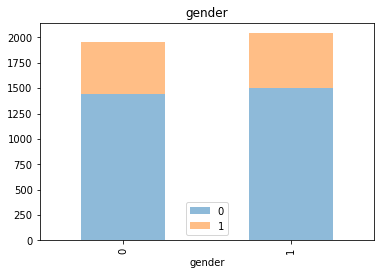

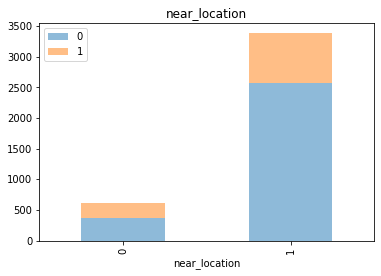

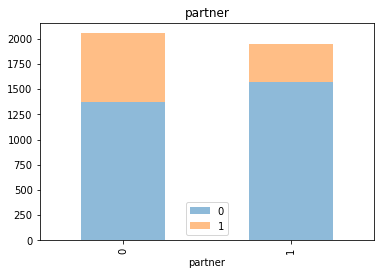

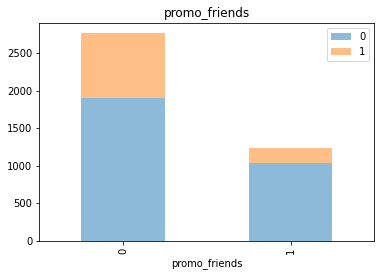

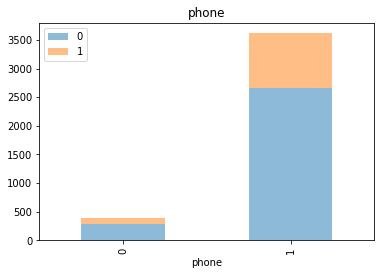

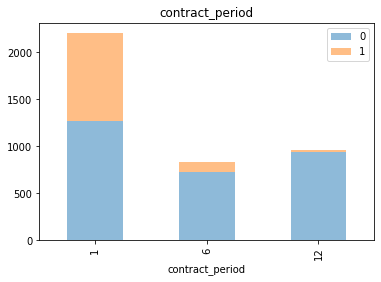

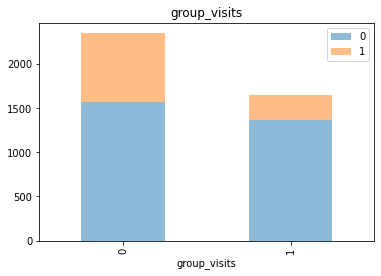

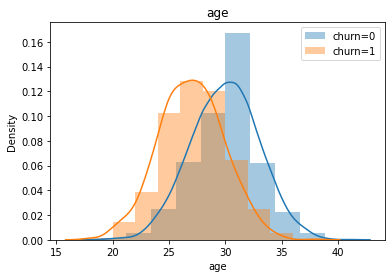

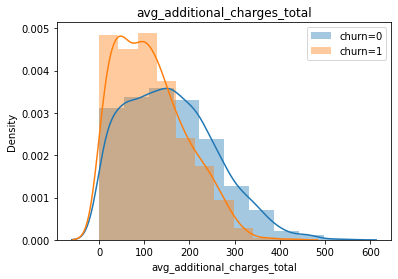

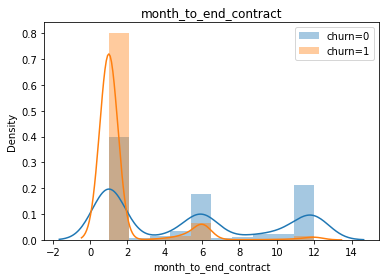

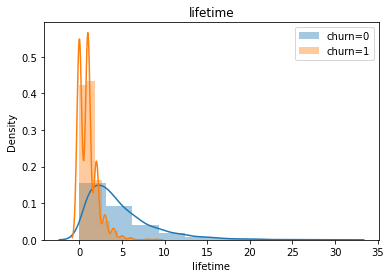

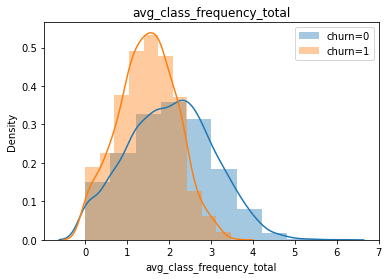

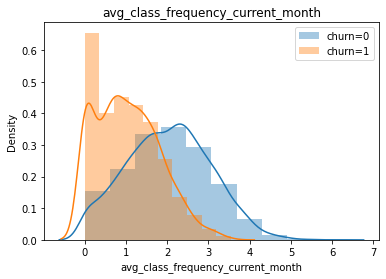

In [10]:
# создадим функцию для построения графиков

def feat_hist(x, group_col, key_cols):
    x_new = x.copy()[key_cols]
    for c in key_cols:
        
        if c == group_col:
            continue
        
        if len(x_new[c].unique()) < 10:
            report = x_new.reset_index().pivot_table(index = c, columns = group_col, values = 'index', aggfunc = 'count')
            report.plot(kind = 'bar', stacked = True, alpha = 0.5) 
        
        else:
            for cl in x[group_col].unique():
                sns.distplot(x_new[x_new[group_col] == cl][c], label = '{}={}'.format(group_col, str(cl)), bins = 10)
        plt.title(c)
        plt.legend()
        plt.show()

# строим графики

feat_hist(df, 'churn', df.columns)

Получаем различия в портретах пользователей по целевому признаку:

|Критерий |Остались|Ушли|
|:-----|:----:|----:|
|Пол |Женщина |Женщина |
|Возраст |Старше 30 |Моложе 30 |
|Проживает/работает рядом |Да |Да |
|Контактный номер телефона |Да |Да |
|Сотрудник организации-партнера |Да |Нет |
|Акция "Приведи друга" |Нет |Нет |
|С момента первого обращения прошло |4 |1 |
|Текущий абонемент |6 |1 |
|До окончания текущего действующего абонемента |6 |1 |
|Групповые занятия |Нет |Нет |
|Средняя частота посещений в неделю за все время |2 |1 |
|Средняя частота посещений в неделю за предыдущий месяц |2 |Реже 1 раза |
|Суммарная выручка от других услуг фитнес-центра |149 - 158 |103 - 115 |

### Матрица корреляций

Для определения степени влияния наших критериев на отток посетитетелей, построим матрицу корреляций. Она позволит понять, какие признаки станут ключевыми для модели прогнозирования оттока, а какими можно и даже нужно пренебречь.

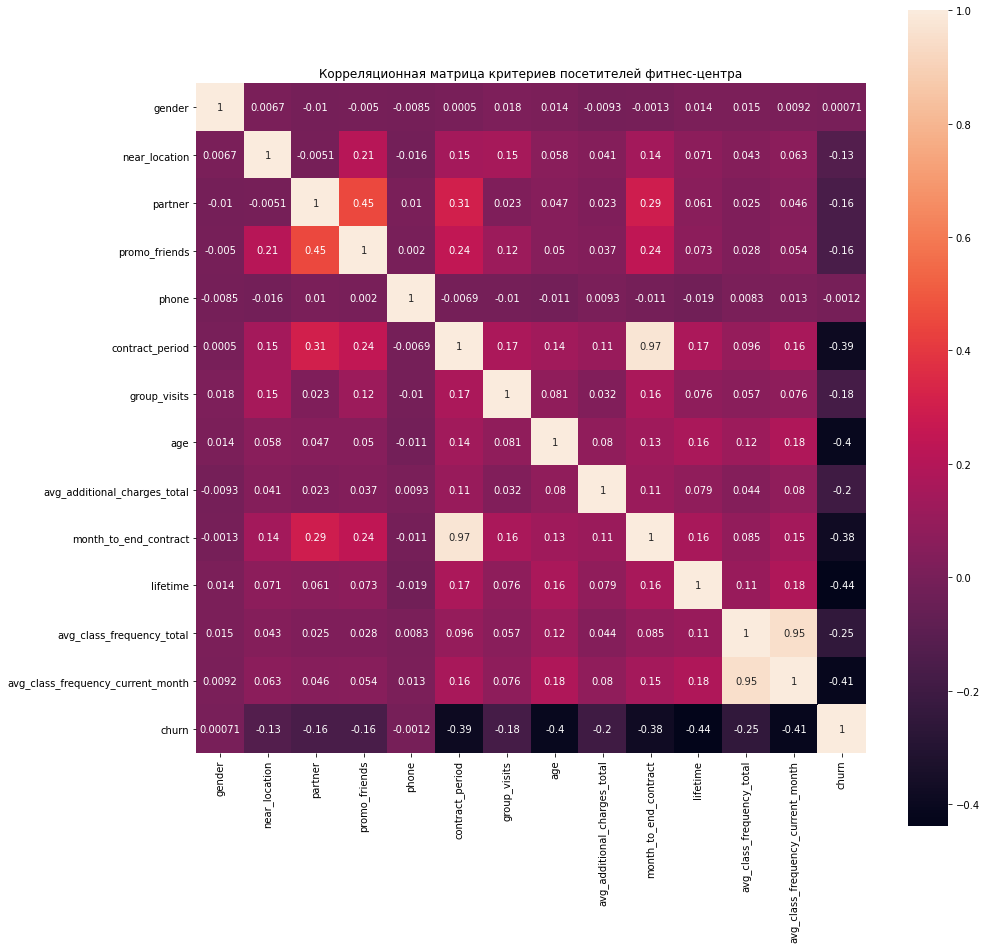

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), square = True, annot = True)
plt.title('Корреляционная матрица критериев посетителей фитнес-центра')
plt.show()

Сильно коррелируют между собой несколько критериев: кол-во месяцев до окончания текущего действующего абонемента и срок текущего абонемент, а также  средняя частота посещений в неделю за все время/за предыдущий месяц. Это приводит нас к проблеме мультиколлинеарности. 

Чтобы избавиться от мультиколлинеарности и получить достоверные результаты регрессии, удалим из датафрейма один столбец из каждой пары :

In [12]:
# убираем один из пары коррелирующих признаков 

for col in ['avg_class_frequency_total', 'contract_period']:
    df.drop(col, axis = 1, inplace = True) 

## Построение модели прогнозирования оттока пользователей


Приступим к построению модели прогнозирования оттока посетителей фитнес-центра.

**Целевой признак** - факт оттока пользователя в следующем месяце. 

Поскольку наш целевой признак принимает лишь 2 значения (0 и 1), можно его отнести к бинарной величине. Тогда для решения нашей задачи подойдет логическая регрессия. Построим модель.

### Логическая регрессия

In [13]:
# разделяем данные на критерии и целевую переменную

X = df.drop('churn', axis = 1)
y = df['churn']

# разделяем модель на обучающую и валидационную выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# создадим функцию для моделирования и рассчета метрик

def prediction_metrics(m, X_train, X_test, y_train, y_test):
    
    model = m
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:,1]
    
    print(m)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, predictions)))
    print('\tF1: {:.2f}'.format(f1_score(y_test, predictions)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

In [15]:
# обучим модель через логическую регрессию

lr_model = LogisticRegression(random_state=0, solver='liblinear') 
prediction_metrics(lr_model, X_train, X_test, y_train, y_test)

LogisticRegression(random_state=0, solver='liblinear')
	Accuracy: 0.90
	Precision: 0.80
	Recall: 0.79
	F1: 0.79
	ROC_AUC: 0.96


Правильно прогнозируем 90% значений, точность и полнота также находятся на хорошем уровне (баланс между ними близок к 1), а размер площади под кривой говорит о хорошем качестве полученного прогноза, иными словами, модель работает.

### Случайный лес

Чтобы избежать ошибок, которые могут быть в линейной регрессии (неравномерность распределения по группам по целевому критерию), проверим зависимость критериев на отток через еще одну модель прогнозирования - случайный лес (распределение происходит случайным образом).

In [16]:
# обучим модель через случайный лес

rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)
prediction_metrics(rf_model, X_train, X_test, y_train, y_test)

RandomForestClassifier(random_state=0)
	Accuracy: 0.91
	Precision: 0.83
	Recall: 0.79
	F1: 0.81
	ROC_AUC: 0.95


Правильно прогнозируем 91% значений, точность и полнота также находятся на хорошем уровне (баланс между ними близок к 1), а размер площади под кривой говорит о хорошем качестве полученного прогноза, иными словами, модель работает.

Таким образом, мы получили 2 рабочии модели прогнозирования оттока посетителей фитнес-центра с высоким качеством полученного прогноза.

## Кластеризация пользователей


Чтобы минимизировать отток посетителей из фитнес-центра, необходимо распределить клиентов на группы: для каждой группы клиентов предлагать персональные услуги/скидки/опции, поддерживая их интерес к посещениям.

Произведем кластеризацию наших пользователей сети фитнес-центров.

### Агломеративная иерархическая кластеризация

In [17]:
# составим датасет из критериев

df_feature = df.drop('churn', axis = 1)

In [18]:
# стандартизируем данные

sc = StandardScaler()
x_sc = sc.fit_transform(df_feature)

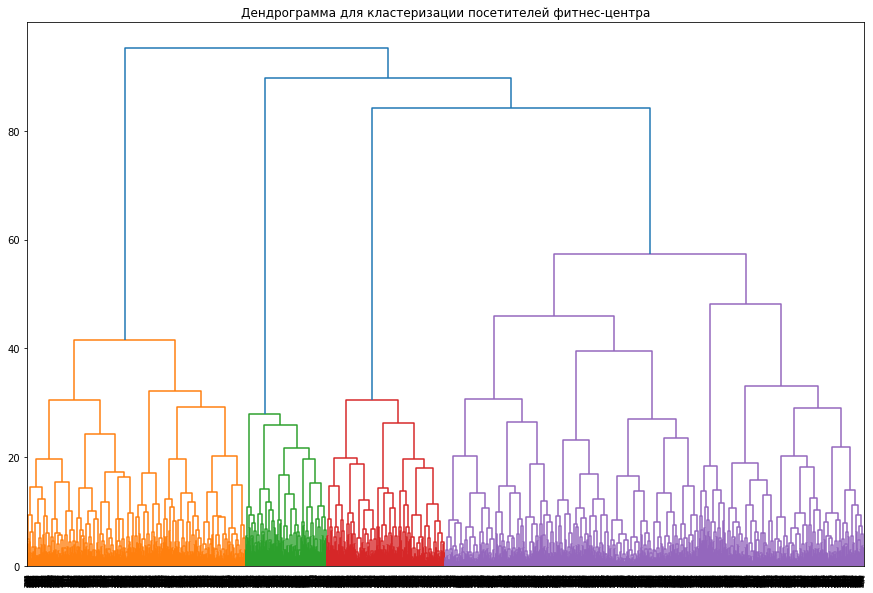

In [19]:
# построим матрицу расстояний

linked = linkage(x_sc, method = 'ward') 

# построим дендрограмму

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма для кластеризации посетителей фитнес-центра')
plt.show()

Предложенное оптимальное число кластеров 4 — четыре разных цвета на графике. То есть для корректной работы с посетителями центра необходимо их поделить на 4 группы, а для каждой группы прописать пинципы работы и общения.

Поскольку расчет и построение дендрограммы довольно сложен и долог, запустим кластеризацию посетителей по алгоритму K-Means.

### K-Means

In [20]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state

km = KMeans(n_clusters=5, random_state=0)

# прогнозируем кластеры для наблюдений

labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета

df_feature['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластерам

display(df_feature.groupby('cluster_km').median())

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_current_month
cluster_km,,,,,,,,,,,
0,0,1,1,1,1,1,30,148.286008,6,3,1.901862
1,0,1,0,0,1,0,30,165.249586,1,4,2.240843
2,1,1,0,0,1,0,27,97.941120,1,1,0.882173
3,1,0,0,0,1,0,29,124.999854,1,2,1.507663
4,1,1,0,0,1,1,30,148.480550,2,3,2.065445


Получаем 5 портретов пользователей:

|Критерий |0|1|2|3|4|
|:-----|:----:|----:|----:|----:|----:|
|Пол |Мужчина |Мужчина |Женщина |Женщина |Женщина |
|Возраст |30 |30 |27 |29 |30 |
|Проживает/работает рядом |Да |Да |Да |Нет |Да |
|Контактный номер телефона |Да |Да |Да |Да |Да |
|Сотрудник организации-партнера |Да |Нет |Нет |Нет |Нет |
|Акция "Приведи друга" |Да |Нет |Нет |Нет |Нет |
|С момента первого обращения прошло |3 |4 |1 |2 |3 |
|До окончания текущего действующего абонемента |6 |1 |1 |1 |2 |
|Групповые занятия |Да |Нет |Нет |Нет |Да |
|Средняя частота посещений в неделю за предыдущий месяц |1 |2 |0 |1 |2 |
|Суммарная выручка от других услуг фитнес-центра |148 |165 |97 |124 |148 |

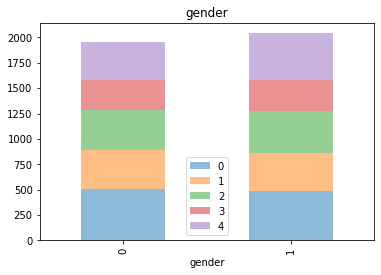

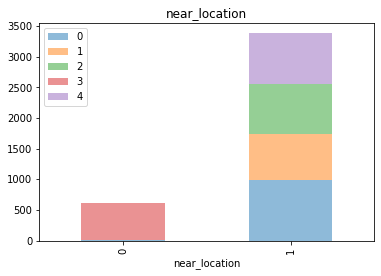

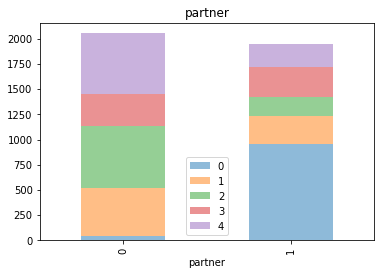

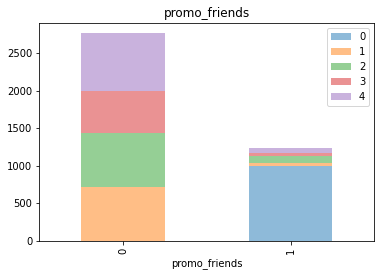

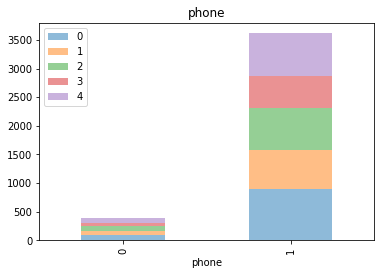

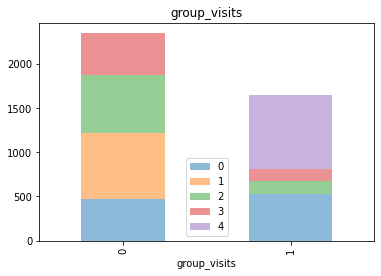

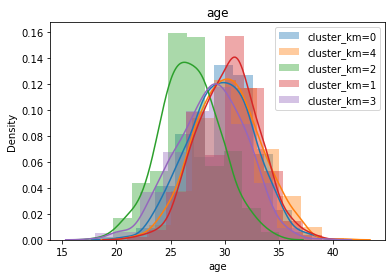

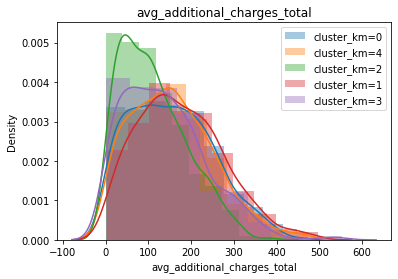

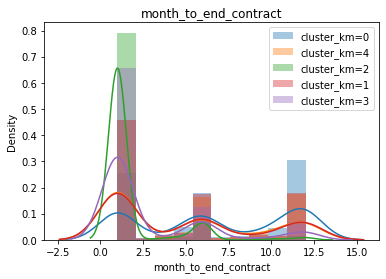

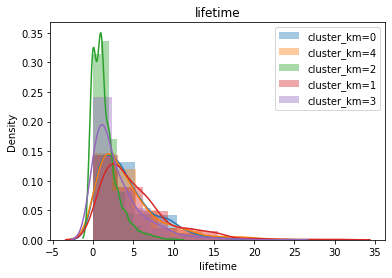

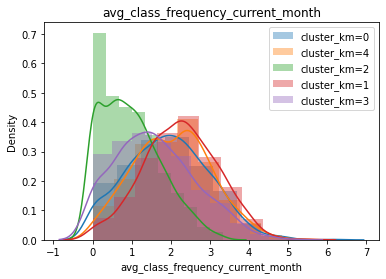

In [21]:
# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам

feat_hist(df_feature, 'cluster_km', df_feature.columns)

Для каждого полученного кластера посчитаем долю оттока.

In [22]:
# переносим кластеры на нашу клиентскую выборку

df['cluster'] = labels
df.head()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_current_month,churn,cluster
0,1,1,1,1,0,1,29,14.227470,5,3,0.000000,0,0
1,0,1,0,0,1,1,31,113.202938,12,7,1.910244,0,4
2,0,1,1,0,1,0,28,129.448479,1,2,1.736502,0,2
3,0,1,1,1,1,1,33,62.669863,12,2,3.357215,0,0
4,1,1,1,1,1,0,26,198.362265,1,3,1.120078,0,0


<AxesSubplot:xlabel='cluster'>

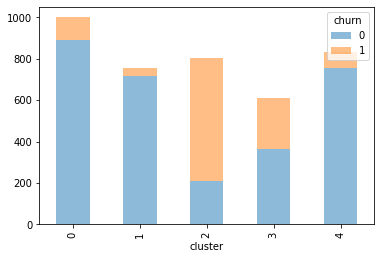

In [23]:
# строим график оттока посетителей по кластерам

report = df.reset_index().pivot_table(index = 'cluster', columns = 'churn', values = 'index', aggfunc = 'count')
report.plot(kind = 'bar', stacked = True, alpha = 0.5)


Таким образом, получается, что наиболее подвержены оттоку посетители кластера 2 и 3. А зная их портреты, можно определить основные признаки, наиболее сильно влияющие на отток.

## Вывод

Подведем итоги.

В рамках анализа были сформированы и описаны 5 типичных портретов пользователей:

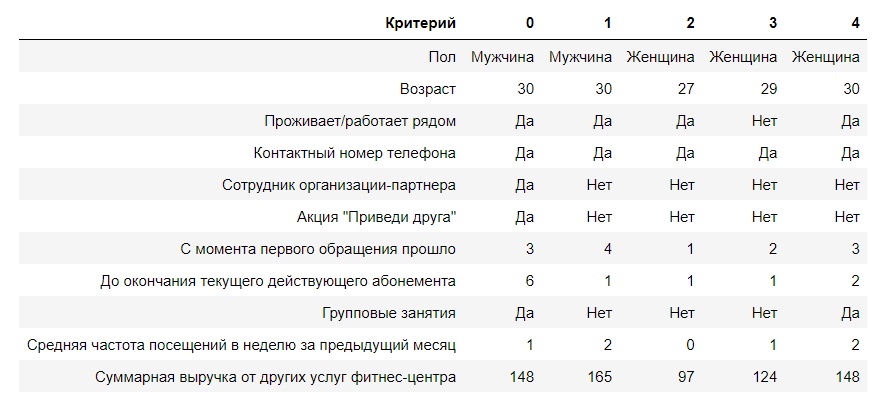

Наиболее подвержены оттоку клиенты из кластера 2.

С учетом целевого признака, можно выделить следующие отличительные черты, на которые стоит обращать внимание при поиске клиентов, которые могут попасть в отток:

    Женщина;
    Моложе 30 лет;
    
    
    Не является сотрудником организации-партнера;
    Не участник акции "Приведи друга";
    
    С момента первого обращения прошло не более 2 месяцев;
    До окончания текущего действующего абонемента 1 месяц;
    Не посещает групповые занятия;
    
    Средняя частота посещений в неделю за предыдущий месяц: не более 1 раза;
    Суммарная выручка от других услуг фитнес-центра: менее 125 у.е.

В рамках анализа были построены 2 рабочие модели прогнозирования оттока посетителей фитнес-центра. Данная разработка поможет научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента.

**Рекомендации для бизнеса:**

1) организовать периодические звонки клиентам с уточнением возможных причин прекращения посещений/недовольтсв работой зала

2) провести наблюдение и оценить загрузку тренажеров в вечернее время (возможно нехватка кардио тренажеров, о чем говорит отток женщин моложе 30 лет)

3) расширить/доработать перечень групповых занятий, продумать их работу в течение всего дня